logistic
decision tree
random forest

In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/content/census-income .csv')

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [9]:
df.duplicated().sum()

np.int64(24)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


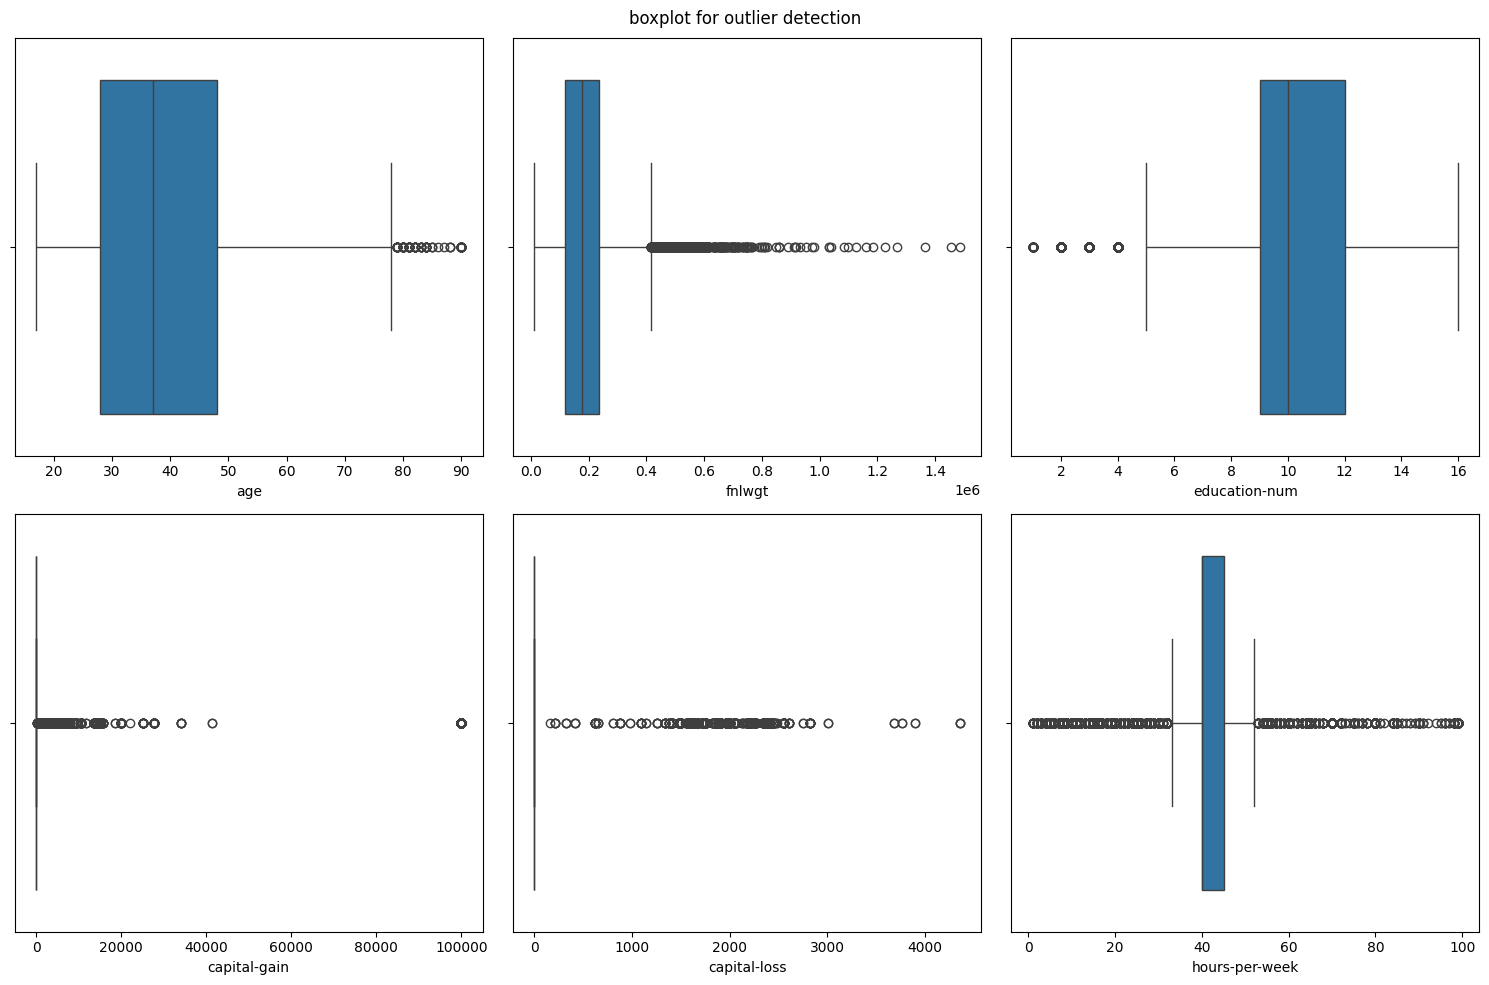

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
numerical_cols = df.select_dtypes(include=np.number).columns

for i, col in enumerate(numerical_cols):
  sns.boxplot(x=df[col], ax=axes[i])
  axes[i].set_xlabel(col)

plt.suptitle('boxplot for outlier detection')
plt.tight_layout()
plt.show()

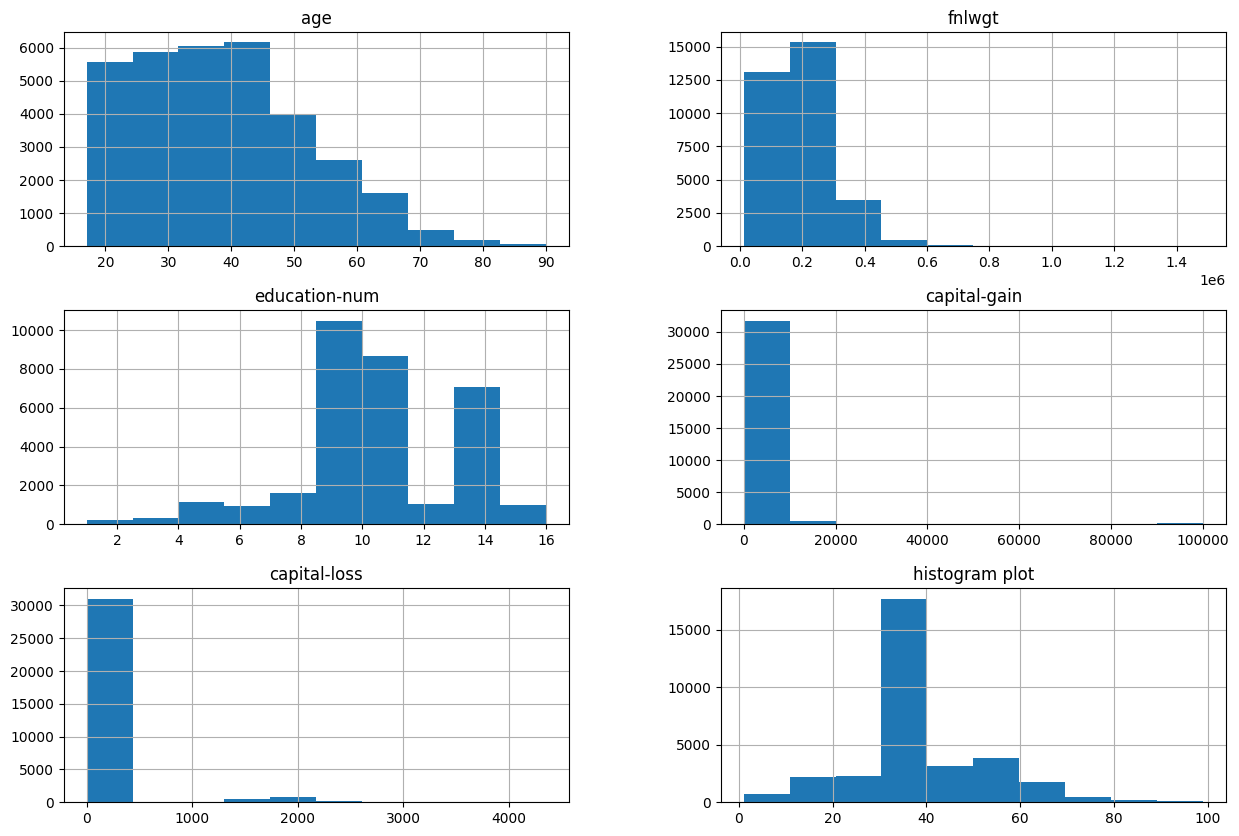

In [14]:
df.hist(figsize=(15, 10))
plt.title('histogram plot')
plt.show()

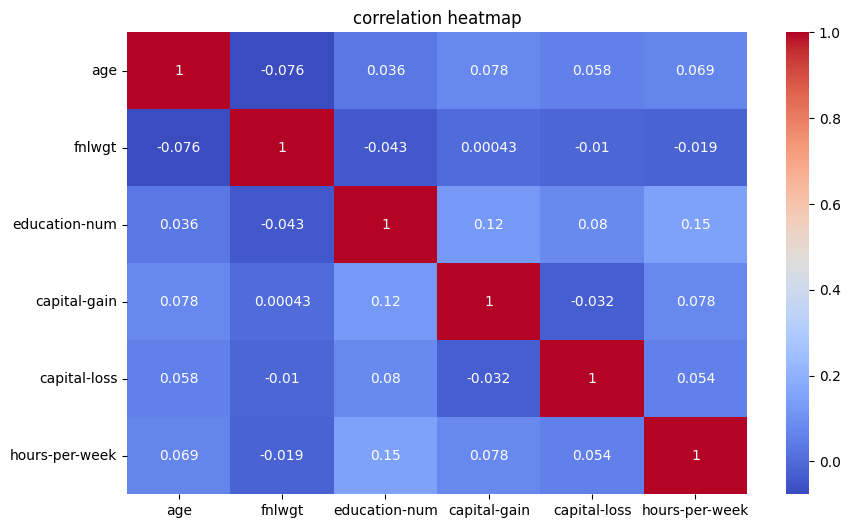

In [15]:
numerical_df = df.select_dtypes(include=np.number)
correlation = numerical_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

In [16]:
x = df.drop('annual_income', axis=1)
y = df['annual_income']

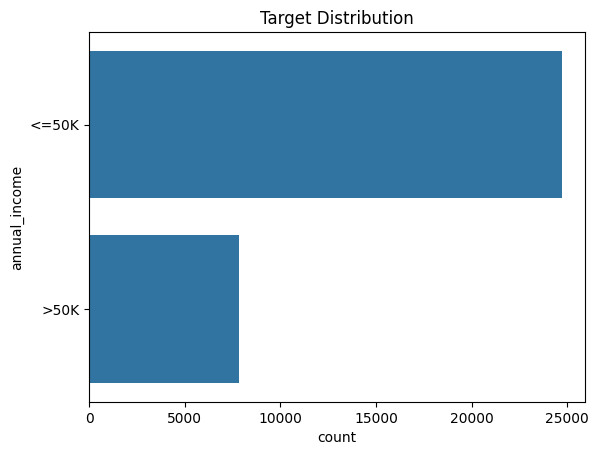

In [17]:
sns.countplot(y)
plt.title('Target Distribution')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, shuffle=True)


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in x_train.columns:
  if x_train[col].dtype == 'object':
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])



In [20]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [23]:
print(f'Shape of x_train before SMOTE: {x_train.shape}')
print(f'Shape of x_train after SMOTE: {x_train_resampled.shape}')
print(f'Shape of y_train before SMOTE: {y_train.shape}')
print(f'Shape of y_train after SMOTE: {y_train_resampled.shape}')

Shape of x_train before SMOTE: (26029, 14)
Shape of x_train after SMOTE: (39516, 14)
Shape of y_train before SMOTE: (26029,)
Shape of y_train after SMOTE: (39516,)


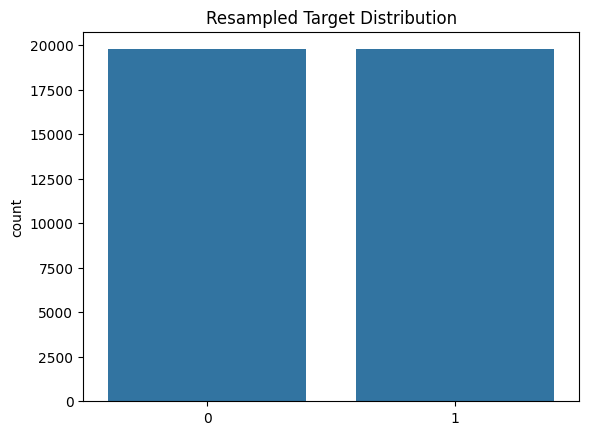

In [24]:
sns.countplot(x=y_train_resampled)
plt.title("Resampled Target Distribution")
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

In [26]:
y_pred = lr.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred)*100)

76.78242163491088


# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [30]:
y_pred_dt = dt.predict(x_test)

In [31]:
print(accuracy_score(y_test, y_pred_dt)*100)

79.87092808850646


In [32]:
best_depth = 0
best_accuracy = 0

for depth in range(1, 10):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_train_resampled, y_train_resampled)
    y_pred_dt = dt.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_dt)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth




In [33]:
best_accuracy

0.809157959434542

In [34]:
best_depth

8

In [35]:
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=9)

In [36]:
y_pred_dt = dt.predict(x_test)
accuracy_score(y_test, y_pred_dt)*100

80.3779963122311

# RandomForest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier()
rf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier()

In [39]:
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)*100

84.5881991395206

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200],           
    'max_depth': [None, 10, 20],         
    'min_samples_split': [2, 5,10],     
    'min_samples_leaf': [1, 2],     
}



grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search_rf.fit(x_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best accuracy score: ", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"Test accuracy with best Random Forest model: {test_accuracy*100:.2f}%")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score:  0.9001938419838517
Test accuracy with best Random Forest model: 84.76%


In [ ]:

rf_best = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
rf_best.fit(x_train_resampled, y_train_resampled)

y_pred_rf_best = rf_best.predict(x_test)

accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f"Accuracy of Random Forest with specified parameters: {accuracy_rf_best*100:.2f}%")

print(classification_report(y_test, y_pred_rf_best, target_names=['<=50K', '>50K']))
print(classification_report(y_test, y_pred_rf, target_names=['<=50K', '>50K']))

Accuracy of Random Forest with specified parameters: 84.74%


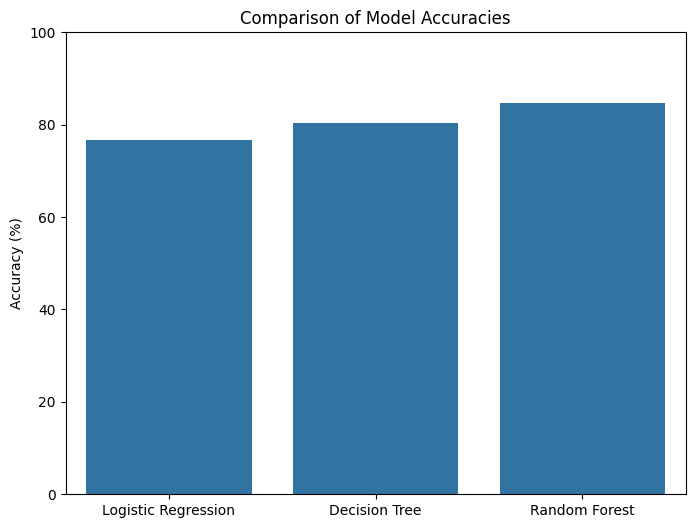

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred)*100, accuracy_score(y_test, y_pred_dt)*100, accuracy_score(y_test, y_pred_rf)*100]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f'confusion matrix of {title}')
  plt.show()



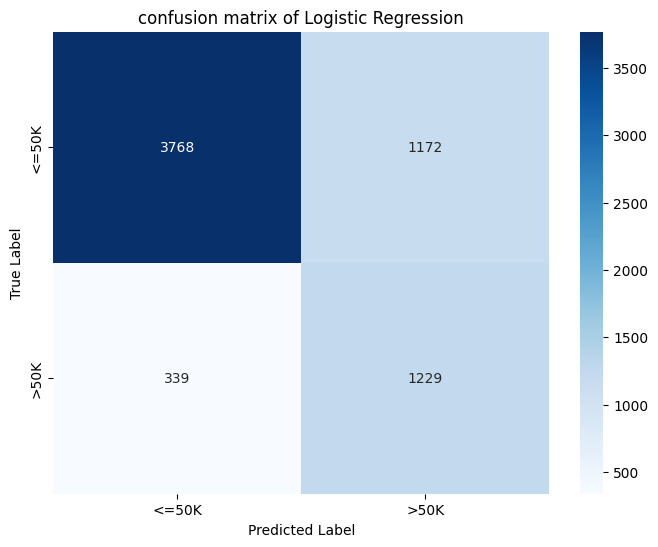

In [47]:
plot_confusion_matrix(y_test, y_pred, classes=['<=50K', '>50K'], title='Logistic Regression')

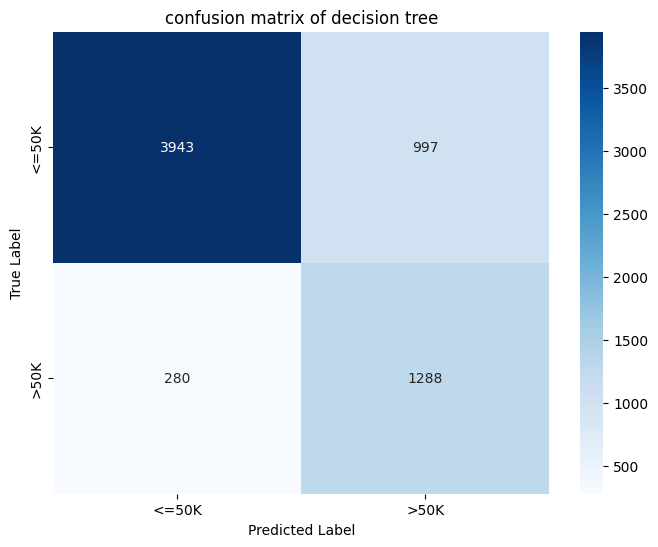

In [48]:
plot_confusion_matrix(y_test, y_pred_dt, classes=['<=50K', '>50K'], title='decision tree')

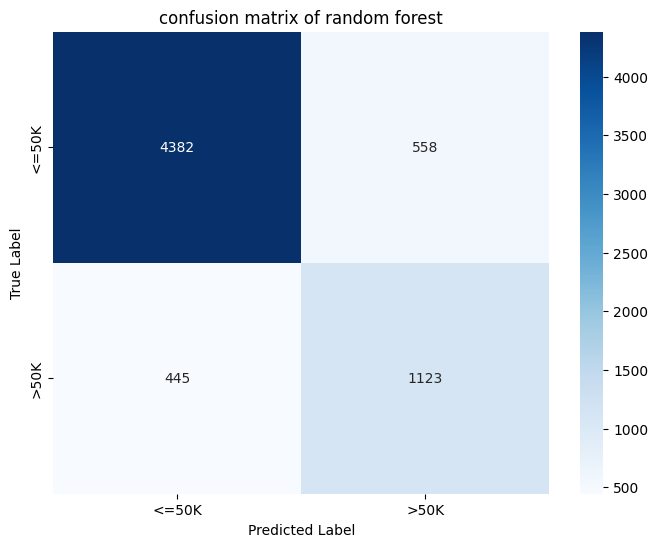

In [49]:
plot_confusion_matrix(y_test, y_pred_rf, classes=['<=50K', '>50K'], title='random forest')

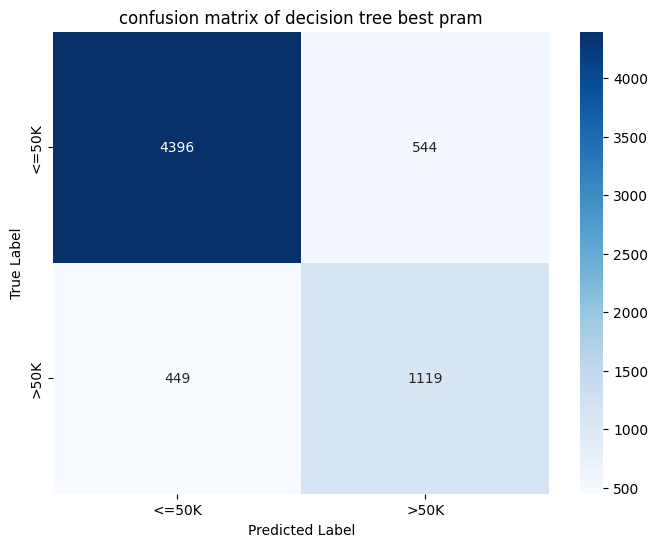

In [60]:
plot_confusion_matrix(y_test, y_pred_rf_best, classes=['<=50K', '>50K'], title='decision tree best pram')

In [51]:
# prompt: classification report plot of all 3 models

from sklearn.metrics import classification_report

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=['<=50K', '>50K']))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['<=50K', '>50K']))



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       <=50K       0.92      0.76      0.83      4940
        >50K       0.51      0.78      0.62      1568

    accuracy                           0.77      6508
   macro avg       0.71      0.77      0.73      6508
weighted avg       0.82      0.77      0.78      6508


Classification Report for Decision Tree:
              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      4940
        >50K       0.56      0.82      0.67      1568

    accuracy                           0.80      6508
   macro avg       0.75      0.81      0.76      6508
weighted avg       0.84      0.80      0.81      6508


Classification Report for Random Forest:
              precision    recall  f1-score   support

       <=50K       0.91      0.89      0.90      4940
        >50K       0.67      0.72      0.69      1568

    accuracy                           0.85      65

In [61]:
print(classification_report(y_test, y_pred_rf_best, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.91      0.89      0.90      4940
        >50K       0.67      0.71      0.69      1568

    accuracy                           0.85      6508
   macro avg       0.79      0.80      0.80      6508
weighted avg       0.85      0.85      0.85      6508

